In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression as LS
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
data=pd.read_excel("C:/Users/karthika/Downloads/Flight .xlsx")

In [3]:
data.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8.0,On,L,5.0
1,Kevin,kevin,23.0,16.0,B,U,8.0,On,L,5.0
2,Kevin,RR,NaN,18.0,A,L,10.0,On,R,6.0
3,Priya,Nithya,27.0,20.0,A,U,10.0,On,R,4.0
4,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,8.0


In [4]:
data.tail()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
83,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,7.0
84,Priya,Sathana,NaN,18.5,B,L,5.0,Off,R,5.0
85,Priya,Yogashree,30.0,19.0,NaN,U,8.0,Off,R,4.0
86,Giri,giri,25.0,17.0,B,U,8.0,On,R,5.0
87,Giri,Kiruthik,28.5,20.5,B,L,8.0,Off,R,7.0


In [5]:
data.describe()

,Length,Breadth,Foldings,Distance
count,71.000000,88.000000,88.000000,88.000000
mean,26.708451,18.500000,8.136364,6.090909
std,11.920268,1.339068,1.736570,1.974762
min,0.000000,16.000000,5.000000,1.000000
25%,22.500000,17.500000,8.000000,5.000000
50%,28.500000,18.500000,8.000000,6.000000
75%,29.500000,20.000000,10.000000,7.000000
max,98.000000,20.500000,10.000000,11.000000


In [6]:
data.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

In [7]:
data.shape

(88, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person           88 non-null     object 
 1   Item_Identifier  88 non-null     object 
 2   Length           71 non-null     float64
 3   Breadth          88 non-null     float64
 4   PaperQuality     80 non-null     object 
 5   Angle            84 non-null     object 
 6   Foldings         88 non-null     float64
 7   Windspeed        88 non-null     object 
 8   Dominanthand     88 non-null     object 
 9   Distance         88 non-null     float64
dtypes: float64(4), object(6)
memory usage: 7.0+ KB


In [9]:
x=data[['Person','Item_Identifier','Length','Breadth','PaperQuality','Angle','Foldings','Dominanthand']]
y=data.Distance

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [11]:
x_train.shape

(70, 8)

In [12]:
x_test.shape

(18, 8)

In [13]:
data.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x27466856b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2746686e220>,
 'boxes': [<matplotlib.lines.Line2D at 0x27466856730>],
 'medians': [<matplotlib.lines.Line2D at 0x2746686e940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2746686ecd0>],
 'means': []}

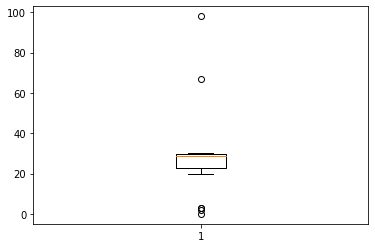

In [14]:
plt.boxplot(data.Length)

In [15]:
data.Length.describe()

count    61.000000
mean     26.816393
std      12.756517
min       0.000000
25%      23.000000
50%      28.500000
75%      29.500000
max      98.000000
Name: Length, dtype: float64

In [16]:
data.Length.fillna(26.81,inplace=True)

In [17]:
data.isnull().sum()

Person             0
Item_Identifier    0
Length             0
Breadth            0
PaperQuality       0
Angle              0
Foldings           0
Windspeed          0
Dominanthand       0
Distance           0
dtype: int64

In [18]:
data.Distance.max()
data.Distance.min()
data.Distance.describe()


count    61.000000
mean      6.213115
std       2.034001
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      11.000000
Name: Distance, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2746694eb80>,
 'caps': [<matplotlib.lines.Line2D at 0x2746695b1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2746694e7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2746695b8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2746695bc40>],
 'means': []}

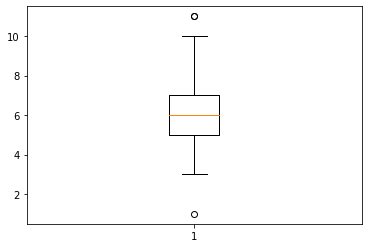

In [19]:
plt.boxplot(data.Distance)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Person', ylabel='count'>

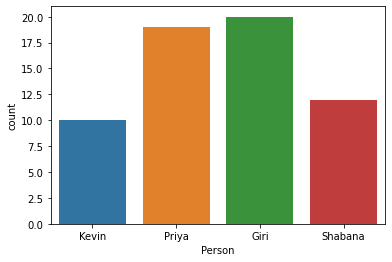

In [20]:
sns.countplot(data.Person)

In [21]:
data.Person.value_counts()

Giri       20
Priya      19
Shabana    12
Kevin      10
Name: Person, dtype: int64

In [22]:
(data.Length.isnull().mean())*100

0.0

In [23]:
data.Length.fillna(data.Length.mean(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x27466a36be0>,
 'caps': [<matplotlib.lines.Line2D at 0x27466a43340>,
 'boxes': [<matplotlib.lines.Line2D at 0x27466a36850>],
 'medians': [<matplotlib.lines.Line2D at 0x27466a43a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x27466a43df0>],
 'means': []}

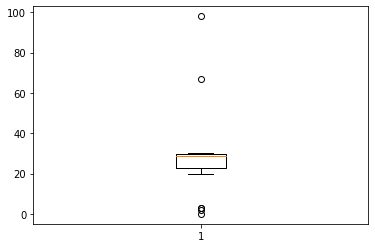

In [24]:
plt.boxplot(data.Length)

In [25]:
data.Breadth.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x27466a9faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x27466aae280>,
 'boxes': [<matplotlib.lines.Line2D at 0x27466a9f760>],
 'medians': [<matplotlib.lines.Line2D at 0x27466aae9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27466aaed30>],
 'means': []}

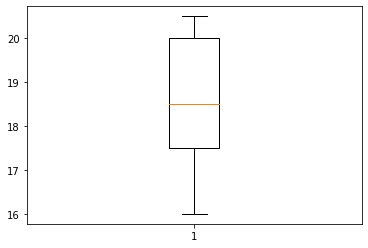

In [26]:
plt.boxplot(data.Breadth)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Breadth', ylabel='count'>

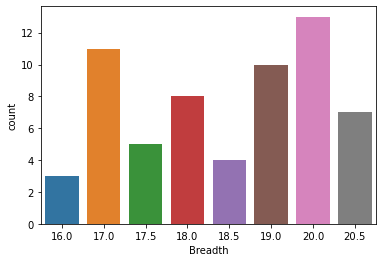

In [27]:
sns.countplot(data.Breadth)

In [28]:
data.PaperQuality.isnull().sum()

0

In [29]:
data.PaperQuality.fillna("others",inplace=True)

In [30]:
data.PaperQuality.value_counts()

B    38
A    23
Name: PaperQuality, dtype: int64

In [31]:
data.Angle.isnull().sum()

0

In [32]:
data.Angle.value_counts()

U    47
L    14
Name: Angle, dtype: int64

In [33]:
data.Angle.fillna('U',inplace=True)

In [34]:
data.Angle.value_counts()

U    47
L    14
Name: Angle, dtype: int64

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle', ylabel='count'>

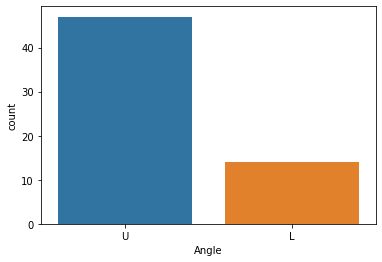

In [35]:
sns.countplot(data.Angle)

In [36]:
data.Foldings.isnull().sum()

0

In [37]:
data.Foldings.value_counts()

8.0     33
10.0    19
5.0      9
Name: Foldings, dtype: int64

In [38]:
data.Foldings.replace([5,8,10],['five','eight','ten'],inplace=True)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Foldings', ylabel='count'>

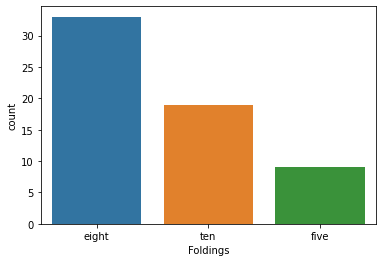

In [39]:
sns.countplot(data.Foldings)

In [40]:
data.Dominanthand.isnull().sum()

0

In [41]:
data.Dominanthand.value_counts()

R    49
L    12
Name: Dominanthand, dtype: int64

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dominanthand', ylabel='count'>

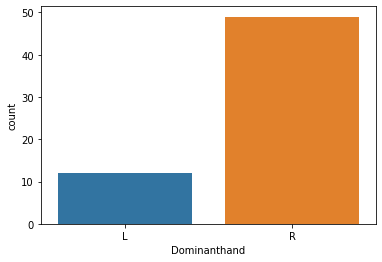

In [42]:
sns.countplot(data.Dominanthand)

In [43]:
data.Distance.isnull().sum()


0

{'whiskers': [<matplotlib.lines.Line2D at 0x27466ca5d00>,
 'caps': [<matplotlib.lines.Line2D at 0x27466cb5460>,
 'boxes': [<matplotlib.lines.Line2D at 0x27466ca5970>],
 'medians': [<matplotlib.lines.Line2D at 0x27466cb5b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x27466cb5f10>],
 'means': []}

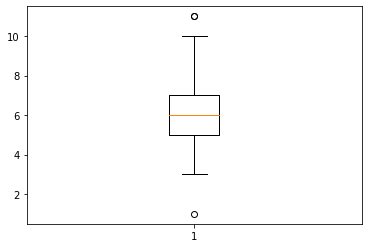

In [44]:
plt.boxplot(data.Distance)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance', ylabel='count'>

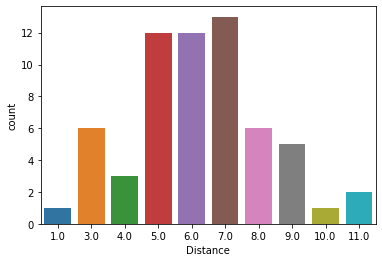

In [45]:
sns.countplot(data.Distance)

In [46]:
import statsmodels.api as  sm
per1=data.Distance[data.Person=="Kevin"]
per2=data.Distance[data.Person=="Giri"]
per3=data.Distance[data.Person=="Priya"]
per4=data.Distance[data.Person=="Shabana"]
stats.f_oneway(per1,per2,per3,per4)


F_onewayResult(statistic=0.08481757869753237, pvalue=0.9680623374710268)

In [47]:
data.Distance.fillna(data.Distance.mean(),inplace=True)

In [48]:
per1=data.Distance[data.Angle=="U"]
per2=data.Distance[data.Angle=="L"]
stats.f_oneway(per1,per2)


F_onewayResult(statistic=0.3517523093554403, pvalue=0.5553895880715427)

In [49]:
per1=data.Distance[data.Dominanthand=="R"]
per2=data.Distance[data.Dominanthand=="L"]
stats.f_oneway(per1,per2)

F_onewayResult(statistic=0.2936881927390987, pvalue=0.5899076066122497)

In [50]:
strength=stats.pearsonr(data.Length,data.Distance)
print(strength)


(0.04958029131501166, 0.7043485823746141)


In [51]:
strength=stats.pearsonr(data.Breadth,data.Distance)
print(strength)


(-0.17370923107310912, 0.18061978408210216)


In [52]:
data.drop('Item_Identifier',axis=1,inplace=True)

In [53]:
data.columns

Index(['Person', 'Length', 'Breadth', 'PaperQuality', 'Angle', 'Foldings',
       'Windspeed ', 'Dominanthand', 'Distance'],
      dtype='object')

In [54]:
dummy_var=pd.get_dummies(data)

In [55]:
dummy_var.columns

Index(['Length', 'Breadth', 'Distance', 'Person_Giri', 'Person_Kevin',
       'Person_Priya', 'Person_Shabana', 'PaperQuality_A', 'PaperQuality_B',
       'Angle_L', 'Angle_U', 'Foldings_eight', 'Foldings_five', 'Foldings_ten',
       'Windspeed _Off', 'Windspeed _On', 'Dominanthand_L', 'Dominanthand_R'],
      dtype='object')

In [56]:
scaler= MinMaxScaler ()

In [57]:
scaler_data=scaler.fit(dummy_var)

In [58]:
scaler_data=scaler.transform(dummy_var)

In [59]:
scaler_data=pd.DataFrame(scaler_data)

In [60]:
scaler_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.295918,0.888889,0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.234694,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.275510,0.888889,0.3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.301020,0.333333,0.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.306122,0.666667,0.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [61]:
y=dummy_var.Distance

In [62]:
x=dummy_var.drop('Distance',axis=1)

In [63]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [64]:
model=LR(random_state=0).fit(train_x,train_y)

C:\Users\karthika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
predicted_y=model.predict(test_x)


In [66]:
predicted_y=model.predict(test_x)

In [67]:
model_tree=DecisionTreeClassifier().fit(train_x,train_y)  
model_tree.score(test_x,test_y)

0.07692307692307693

In [68]:
modelA=LS().fit(train_x,train_y)

In [69]:
modelA.score(train_x,train_y)

0.12324960460735224

In [70]:
modelA.score(x,y)

0.11245719715096614

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [73]:
RandomForestRegressor(n_estimators=10,random_state=0)

RandomForestRegressor(n_estimators=10, random_state=0)

In [74]:
predicted_y=regressor.predict(test_x)

In [75]:
regressor.score(train_x,train_y)

0.15680867935922682

In [76]:
regressor.score(test_x,test_y)

0.014302413525590363

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
regressor=GradientBoostingRegressor(n_estimators=100,random_state=0)
regressor.fit(train_x,train_y)

GradientBoostingRegressor(random_state=0)

In [79]:
predicted_y=regressor.predict(test_x)

In [80]:
regressor.score(train_x,train_y)

0.17039652915957149

In [81]:
regressor.score(test_x,test_y)

0.003119657743720694

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data=pd.read_excel("C:/Users/karthika/Downloads/Flight .xlsx")

x = data[['Person','Item_Identifier','Length','Breadth','PaperQuality','Angle','Foldings','Dominanthand']]
y = data[["Distance"]]

slope, intercept,std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=200)
plt.xlabel('Person','Item_Identifier','Length','Breadth','PaperQuality','Angle','Foldings','Dominanthand')
plt.ylabel ("Distance")
plt.show()

TypeError: can only concatenate str (not "float") to str

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [84]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [87]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)